<a href="https://colab.research.google.com/github/rsoekarta79/Dataset-Moi-Ayamaru-Gaussian-Filter-/blob/main/histogram%2Bgaussian%2Bhaar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

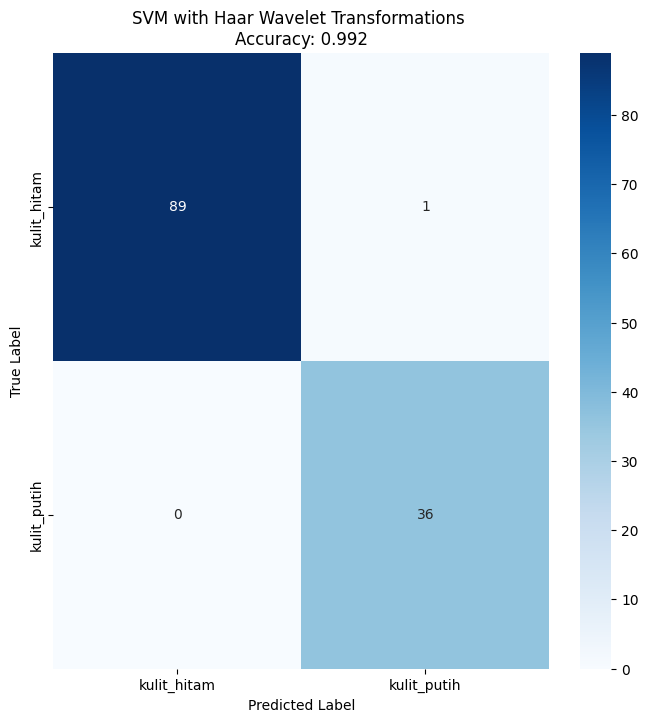

              precision    recall  f1-score   support

 kulit_hitam       1.00      0.99      0.99        90
 kulit_putih       0.97      1.00      0.99        36

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126



In [ ]:
import cv2
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pywt

# Constants
IMAGE_SIZE = (224, 224)

# Paths
train_path = "/content/drive/MyDrive/datatest/train"
test_path = "/content/drive/MyDrive/datatest/test"

# Load and preprocess data
def load_data(path):
    data = []
    labels = []
    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)
        if os.path.isdir(folder_path):
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                image = cv2.imread(file_path)
                if image is not None:
                    image = cv2.resize(image, IMAGE_SIZE)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    image = cv2.equalizeHist(image)  # Histogram equalization
                    image = cv2.fastNlMeansDenoising(image, h=10)  # Noise reduction
                    data.append(image)
                    labels.append(folder)
    return np.array(data), np.array(labels)

train_data, train_labels = load_data(train_path)
test_data, test_labels = load_data(test_path)

def haar_wavelet_transform(images):
    transformed_images = []
    for image in images:
        coeffs = pywt.dwt2(image, 'haar')
        LL, (LH, HL, HH) = coeffs
        transformed_images.append(LL.flatten())
    return np.array(transformed_images)

train_features = haar_wavelet_transform(train_data)
test_features = haar_wavelet_transform(test_data)

# Encode labels
encoder = LabelEncoder()
train_labels_encoded = encoder.fit_transform(train_labels)

# Ensure test labels are only those seen in training
valid_labels = set(encoder.classes_)
test_data_filtered = [(data, label) for data, label in zip(test_features, test_labels) if label in valid_labels]

if test_data_filtered:
    test_features_filtered, test_labels_filtered = zip(*test_data_filtered)
    test_features_filtered = np.array(test_features_filtered)
    test_labels_filtered = np.array(test_labels_filtered)
else:
    test_features_filtered = np.array([])
    test_labels_filtered = np.array([])

# Check if training data has more than one class
if len(set(train_labels_encoded)) > 1:
    if len(test_labels_filtered) > 0:
        test_labels_encoded = encoder.transform(test_labels_filtered)

        # Train SVM classifier
        svm = SVC(kernel='linear', probability=True)
        svm.fit(train_features, train_labels_encoded)

        # Predictions
        predictions = svm.predict(test_features_filtered)

        # Evaluate
        accuracy = accuracy_score(test_labels_encoded, predictions)
        cm = confusion_matrix(test_labels_encoded, predictions)
        report = classification_report(test_labels_encoded, predictions, target_names=encoder.classes_)

        # Plot confusion matrix
        cm_df = pd.DataFrame(cm, index=encoder.classes_, columns=encoder.classes_)

        plt.figure(figsize=(8, 8))
        sns.heatmap(cm_df, annot=True, cmap="Blues", fmt='g')
        plt.title(f'SVM with Haar Wavelet Transformations \nAccuracy: {accuracy:.3f}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

        print(report)
    else:
        print("No valid labels in test set to evaluate.")
else:
    print("Training data does not contain more than one class.")


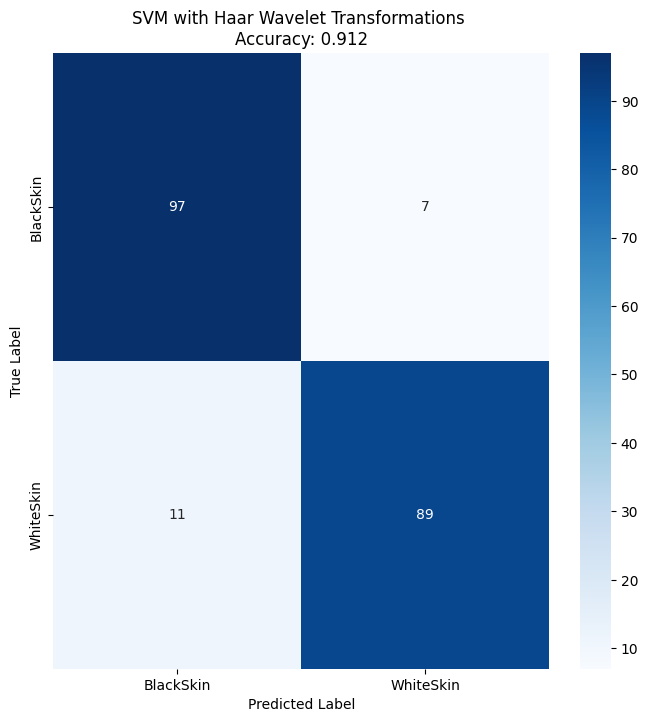

              precision    recall  f1-score   support

   BlackSkin       0.90      0.93      0.92       104
   WhiteSkin       0.93      0.89      0.91       100

    accuracy                           0.91       204
   macro avg       0.91      0.91      0.91       204
weighted avg       0.91      0.91      0.91       204



In [ ]:
import cv2
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pywt

# Constants
IMAGE_SIZE = (224, 224)

# Paths
train_path = "/content/drive/MyDrive/datapublik3/train"
test_path = "/content/drive/MyDrive/datapublik3/test"

# Load and preprocess data
def load_data(path):
    data = []
    labels = []
    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)
        if os.path.isdir(folder_path):
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                image = cv2.imread(file_path)
                if image is not None:
                    image = cv2.resize(image, IMAGE_SIZE)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    image = cv2.equalizeHist(image)  # Histogram equalization
                    image = cv2.fastNlMeansDenoising(image, h=10)  # Noise reduction
                    data.append(image)
                    labels.append(folder)
    return np.array(data), np.array(labels)

train_data, train_labels = load_data(train_path)
test_data, test_labels = load_data(test_path)

def haar_wavelet_transform(images):
    transformed_images = []
    for image in images:
        coeffs = pywt.dwt2(image, 'haar')
        LL, (LH, HL, HH) = coeffs
        transformed_images.append(LL.flatten())
    return np.array(transformed_images)

train_features = haar_wavelet_transform(train_data)
test_features = haar_wavelet_transform(test_data)

# Encode labels
encoder = LabelEncoder()
train_labels_encoded = encoder.fit_transform(train_labels)

# Ensure test labels are only those seen in training
valid_labels = set(encoder.classes_)
test_data_filtered = [(data, label) for data, label in zip(test_features, test_labels) if label in valid_labels]

if test_data_filtered:
    test_features_filtered, test_labels_filtered = zip(*test_data_filtered)
    test_features_filtered = np.array(test_features_filtered)
    test_labels_filtered = np.array(test_labels_filtered)
else:
    test_features_filtered = np.array([])
    test_labels_filtered = np.array([])

# Check if training data has more than one class
if len(set(train_labels_encoded)) > 1:
    if len(test_labels_filtered) > 0:
        test_labels_encoded = encoder.transform(test_labels_filtered)

        # Train SVM classifier
        svm = SVC(kernel='linear', probability=True)
        svm.fit(train_features, train_labels_encoded)

        # Predictions
        predictions = svm.predict(test_features_filtered)

        # Evaluate
        accuracy = accuracy_score(test_labels_encoded, predictions)
        cm = confusion_matrix(test_labels_encoded, predictions)
        report = classification_report(test_labels_encoded, predictions, target_names=encoder.classes_)

        # Plot confusion matrix
        cm_df = pd.DataFrame(cm, index=encoder.classes_, columns=encoder.classes_)

        plt.figure(figsize=(8, 8))
        sns.heatmap(cm_df, annot=True, cmap="Blues", fmt='g')
        plt.title(f'SVM with Haar Wavelet Transformations,histogram eq,Noise reduction \nAccuracy: {accuracy:.3f}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

        print(report)
    else:
        print("No valid labels in test set to evaluate.")
else:
    print("Training data does not contain more than one class.")

<ipython-input-8-b75065c5fc6c>:54: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)


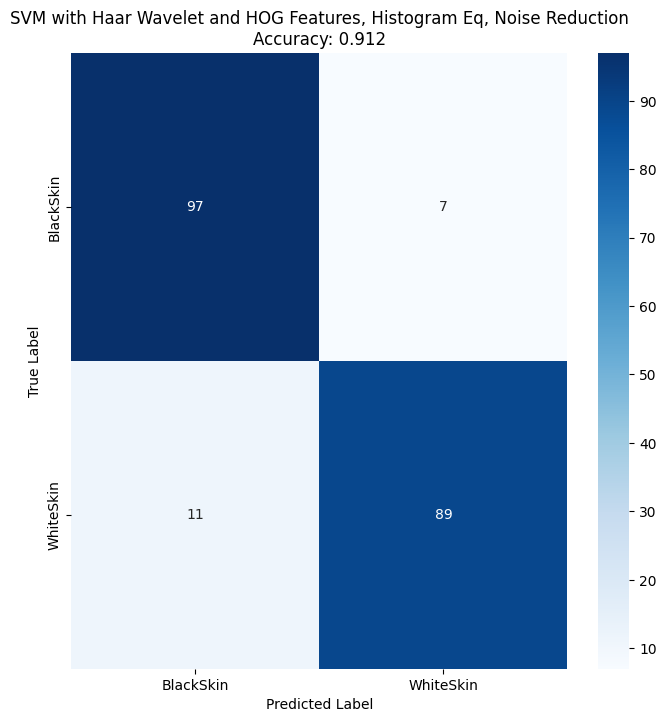

              precision    recall  f1-score   support

   BlackSkin       0.90      0.93      0.92       104
   WhiteSkin       0.93      0.89      0.91       100

    accuracy                           0.91       204
   macro avg       0.91      0.91      0.91       204
weighted avg       0.91      0.91      0.91       204



In [ ]:
import cv2
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.feature import hog
import pywt

# Constants
IMAGE_SIZE = (224, 224)

# Paths
train_path = "/content/drive/MyDrive/datapublik3/train"
test_path = "/content/drive/MyDrive/datapublik3/test"

# Load and preprocess data
def load_data(path):
    data = []
    labels = []
    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)
        if os.path.isdir(folder_path):
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                image = cv2.imread(file_path)
                if image is not None:
                    image = cv2.resize(image, IMAGE_SIZE)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    image = cv2.equalizeHist(image)  # Histogram equalization
                    image = cv2.fastNlMeansDenoising(image, h=10)  # Noise reduction
                    data.append(image)
                    labels.append(folder)
    return np.array(data), np.array(labels)

train_data, train_labels = load_data(train_path)
test_data, test_labels = load_data(test_path)

def haar_wavelet_transform(images):
    transformed_images = []
    for image in images:
        coeffs = pywt.dwt2(image, 'haar')
        LL, (LH, HL, HH) = coeffs
        transformed_images.append(LL.flatten())
    return np.array(transformed_images)

def extract_hog_features(images):
    hog_features = []
    for image in images:
        features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)
        hog_features.append(features)
    return np.array(hog_features)

# Extract Haar wavelet and HOG features
train_haar_features = haar_wavelet_transform(train_data)
test_haar_features = haar_wavelet_transform(test_data)
train_hog_features = extract_hog_features(train_data)
test_hog_features = extract_hog_features(test_data)

# Combine Haar wavelet and HOG features for training data
train_features_combined = np.hstack((train_haar_features, train_hog_features))
test_features_combined = np.hstack((test_haar_features, test_hog_features))

# Encode labels
encoder = LabelEncoder()
train_labels_encoded = encoder.fit_transform(train_labels)

# Ensure test labels are only those seen in training
valid_labels = set(encoder.classes_)
test_data_filtered = [(data, label) for data, label in zip(test_features_combined, test_labels) if label in valid_labels]

if test_data_filtered:
    test_features_filtered, test_labels_filtered = zip(*test_data_filtered)
    test_features_filtered = np.array(test_features_filtered)
    test_labels_filtered = np.array(test_labels_filtered)
else:
    test_features_filtered = np.array([])
    test_labels_filtered = np.array([])

# Check if training data has more than one class
if len(set(train_labels_encoded)) > 1:
    if len(test_labels_filtered) > 0:
        test_labels_encoded = encoder.transform(test_labels_filtered)

        # Train SVM classifier
        svm = SVC(kernel='linear', probability=True)
        svm.fit(train_features_combined, train_labels_encoded)

        # Predictions
        predictions = svm.predict(test_features_filtered)

        # Evaluate
        accuracy = accuracy_score(test_labels_encoded, predictions)
        cm = confusion_matrix(test_labels_encoded, predictions)
        report = classification_report(test_labels_encoded, predictions, target_names=encoder.classes_)

        # Plot confusion matrix
        cm_df = pd.DataFrame(cm, index=encoder.classes_, columns=encoder.classes_)

        plt.figure(figsize=(8, 8))
        sns.heatmap(cm_df, annot=True, cmap="Blues", fmt='g')
        plt.title(f'SVM with Haar Wavelet and HOG Features, Histogram Eq, Noise Reduction\nAccuracy: {accuracy:.3f}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

        print(report)
    else:
        print("No valid labels in test set to evaluate.")
else:
    print("Training data does not contain more than one class.")


<ipython-input-12-d3e9b50e6107>:54: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)


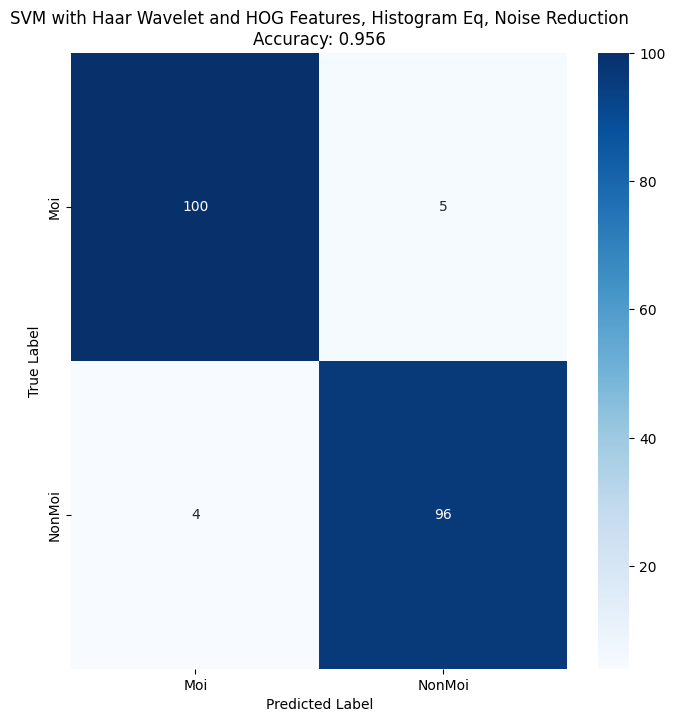

              precision    recall  f1-score   support

         Moi       0.96      0.95      0.96       105
      NonMoi       0.95      0.96      0.96       100

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



In [ ]:
import cv2
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.feature import hog
import pywt

# Constants
IMAGE_SIZE = (224, 224)

# Paths
train_path = "/content/drive/MyDrive/suku13/train"
test_path = "/content/drive/MyDrive/suku13/test"

# Load and preprocess data
def load_data(path):
    data = []
    labels = []
    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)
        if os.path.isdir(folder_path):
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                image = cv2.imread(file_path)
                if image is not None:
                    image = cv2.resize(image, IMAGE_SIZE)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    image = cv2.equalizeHist(image)  # Histogram equalization
                    image = cv2.fastNlMeansDenoising(image, h=10)  # Noise reduction
                    data.append(image)
                    labels.append(folder)
    return np.array(data), np.array(labels)

train_data, train_labels = load_data(train_path)
test_data, test_labels = load_data(test_path)

def haar_wavelet_transform(images):
    transformed_images = []
    for image in images:
        coeffs = pywt.dwt2(image, 'haar')
        LL, (LH, HL, HH) = coeffs
        transformed_images.append(LL.flatten())
    return np.array(transformed_images)

def extract_hog_features(images):
    hog_features = []
    for image in images:
        features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)
        hog_features.append(features)
    return np.array(hog_features)

# Extract Haar wavelet and HOG features
train_haar_features = haar_wavelet_transform(train_data)
test_haar_features = haar_wavelet_transform(test_data)
train_hog_features = extract_hog_features(train_data)
test_hog_features = extract_hog_features(test_data)

# Combine Haar wavelet and HOG features for training data
train_features_combined = np.hstack((train_haar_features, train_hog_features))
test_features_combined = np.hstack((test_haar_features, test_hog_features))

# Encode labels
encoder = LabelEncoder()
train_labels_encoded = encoder.fit_transform(train_labels)

# Ensure test labels are only those seen in training
valid_labels = set(encoder.classes_)
test_data_filtered = [(data, label) for data, label in zip(test_features_combined, test_labels) if label in valid_labels]

if test_data_filtered:
    test_features_filtered, test_labels_filtered = zip(*test_data_filtered)
    test_features_filtered = np.array(test_features_filtered)
    test_labels_filtered = np.array(test_labels_filtered)
else:
    test_features_filtered = np.array([])
    test_labels_filtered = np.array([])

# Check if training data has more than one class
if len(set(train_labels_encoded)) > 1:
    if len(test_labels_filtered) > 0:
        test_labels_encoded = encoder.transform(test_labels_filtered)

        # Train SVM classifier
        svm = SVC(kernel='linear', probability=True)
        svm.fit(train_features_combined, train_labels_encoded)

        # Predictions
        predictions = svm.predict(test_features_filtered)

        # Evaluate
        accuracy = accuracy_score(test_labels_encoded, predictions)
        cm = confusion_matrix(test_labels_encoded, predictions)
        report = classification_report(test_labels_encoded, predictions, target_names=encoder.classes_)

        # Plot confusion matrix
        cm_df = pd.DataFrame(cm, index=encoder.classes_, columns=encoder.classes_)

        plt.figure(figsize=(8, 8))
        sns.heatmap(cm_df, annot=True, cmap="Blues", fmt='g')
        plt.title(f'SVM with Haar Wavelet and HOG Features, Histogram Eq, Noise Reduction\nAccuracy: {accuracy:.3f}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

        print(report)
    else:
        print("No valid labels in test set to evaluate.")
else:
    print("Training data does not contain more than one class.")